# acceralation frequency by wavelet transform

In [15]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import signal
import scipy
import pywt

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use('ggplot')
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec



list=glob.glob("./data/*.csv")


1000 999 999 999 999


<ipython-input-16-07ee473aab2d>:85: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax4.axis([0,100000,1024,1])
<ipython-input-16-07ee473aab2d>:89: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax5.axis([0,100000,1024,1])


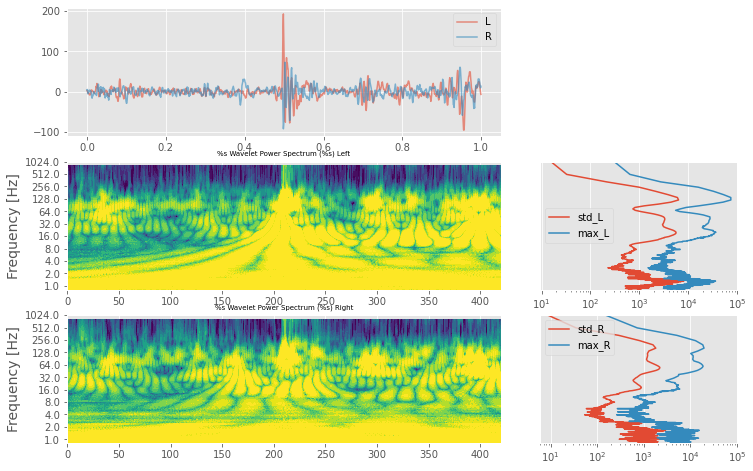

In [16]:
i=0 #select csvfile
df=pd.read_csv(list[i],sep=',',encoding='SHIFT-JIS')
df=df.iloc[2000:3000,:]
sig_L=df["accerelation_L"].values
sig_R=df["accerelation_R"].values


#caluculate velocity　
vel=df.mean(numeric_only=True)[5]
deltadt=10/vel*3.6
dt=np.arange(0,len(sig_L))*deltadt

    
wavelet = 'morl' # 'morl' #'cmor', 'mexh', 'gaus1', 'shan', 'cgau1'

figure = plt.figure(figsize=(12, 8))
gs_master = GridSpec(nrows=3, ncols=3, height_ratios=[1, 1, 1])
gs_1 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[0, :2])
ax1 = figure.add_subplot(gs_1[:, :])
gs_2 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[1, :2])
ax2 = figure.add_subplot(gs_2[:, :])
gs_3 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2, :2])
ax3 = figure.add_subplot(gs_3[:, :])
gs_4 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[1, 2:])
ax4 = figure.add_subplot(gs_4[:, :])
gs_5 = GridSpecFromSubplotSpec(nrows=1, ncols=2, subplot_spec=gs_master[2,2:])
ax5 = figure.add_subplot(gs_5[:, :])

x=np.arange(0,len(sig_L))/float(len(sig_L))
    
ax1.plot(x,sig_L,label='L', alpha=0.6)
ax1.plot(x,sig_R,label='R',alpha=0.6)
ax1.legend()

#wavelet transform
scales = np.arange(1, len(sig_L)) #/10000.
[cfs_L, frequencies_L] = pywt.cwt(sig_L, scales, wavelet)
power_L = (abs(cfs_L)) ** 2
period_L = frequencies_L*len(sig_L)

scales = np.arange(1, len(sig_R)) #/10000.
[cfs_R, frequencies_R] = pywt.cwt(sig_R, scales, wavelet)
power_R = (abs(cfs_R)) ** 2
period_R = frequencies_R*len(sig_R)
        

levels = [ 0.125, 0.25, 0.5, 1, 2, 4, 8 ,16,32,64,128,256,512,1024]
    
print(len(dt), len(period_L), len(power_L), len(period_R), len(power_R)) 
CS=ax2.contourf(dt, np.log2(period_L), np.log2(power_L), np.log2(levels),extend='both')
CSS=ax3.contourf(dt, np.log2(period_R), np.log2(power_R), np.log2(levels),extend='both')
        
ax2.set_title('%s Wavelet Power Spectrum (%s) Left' , fontsize=7)
ax2.set_ylabel('Frequency [Hz]', fontsize=14)
Yticks_L = 2 ** np.arange(np.ceil(np.log2(period_L.min())),np.ceil(np.log2(period_L.max()))*1.1)
ax2.set_yticks(np.log2(Yticks_L))
ax2.set_yticklabels(Yticks_L)
ylim = ax2.get_ylim()

####ax2.plt.colorbar(CS, ax=ax2)

ax3.set_title('%s Wavelet Power Spectrum (%s) Right' , fontsize=7)
ax3.set_ylabel('Frequency [Hz]', fontsize=14)
Yticks_R = 2 ** np.arange(np.ceil(np.log2(period_R.min())),np.ceil(np.log2(period_R.max()))*1.1)
ax3.set_yticks(np.log2(Yticks_R))
ax3.set_yticklabels(Yticks_R)
ylim = ax3.get_ylim()

#######x3.plt.colorbar(CSS, ax=ax3)




stdspec_L=power_L.std(axis=1)
maxspec_L=power_L.max(axis=1)
ax4.loglog(stdspec_L,range(0,len(sig_L)-1),basey=2,label='std_L')
ax4.loglog(maxspec_L,range(0,len(sig_L)-1),basey=2,label='max_L')
    
stdspec_R=power_R.std(axis=1)
maxspec_R=power_R.max(axis=1)
ax5.loglog(stdspec_R,range(0,len(sig_R)-1),basey=2,label='std_R')
ax5.loglog(maxspec_R,range(0,len(sig_R)-1),basey=2,label='max_R')
 
plt.gca().invert_yaxis()
ax4.axis([0,100000,1024,1])
ax4.axes.get_yaxis().set_ticks([])
ax4.legend()

ax5.axis([0,100000,1024,1])
ax5.axes.get_yaxis().set_ticks([])
ax5.legend()


In [ ]:
#feature calculate
#separate frequency band
for k in range(len(list)):
    print(k,"/",len(list)-1)
    df=pd.read_csv(list[k],sep=',',encoding='SHIFT-JIS')
    
    #left acceralation
    #sig_L=df["accerelation_L"].values 
    #scales = np.arange(1, len(sig_L)) #/10000.
    #[cfs_L, frequencies_L] = pywt.cwt(sig_L, scales, wavelet)
    #power = (abs(cfs_L)) ** 2
    
    #right accereaation
    sig_R=df["accerelation_R"].values 
    scales = np.arange(1, len(sig_R)) 
    
    #wavelet transform (feature)
    wavelet = 'morl' 
    [cfs_R, frequencies_R] = pywt.cwt(sig_R, scales, wavelet)
    power = (abs(cfs_R)) ** 2
    
    #velocity
    vel=df.mean(numeric_only=True)[5]
    
    #to separate acceleration frequency 
    arr=[]
    arr1k=[] #512Hz~1kHz
    arr512=[] #256Hz~512kHz 
    arr256=[] #128Hz~256kHz 
    arr128=[] #64Hz~128kHz 
    arr64=[] #32Hz~64Hz
    arr32=[] #16Hz~32Hz
    arr16=[] #0Hz~16Hz
        
    for i in range(1,len(power)-1):
        for j in range(0,len(power[0])):
            if (i <= 16) :
                arr16.append(power[i][j])
                
            if (i <= 32) & (i > 16) :
                arr32.append(power[i][j])    
            if (i <= 64) & (i > 32) :
                arr64.append(power[i][j])
            if (i <= 128) & (i > 64) :
                arr128.append(power[i][j])
            if (i <= 256) & (i > 128) :
                arr256.append(power[i][j])
            if (i <= 512) & (i > 256) :
                arr512.append(power[i][j])
            if (i > 512) :
                arr1k.append(power[i][j])                 
            if  (j < int(7500./float(i)*16.) or j >= 7500-int(7500./float(i)*16.)):
                power[-i][j]=0
            
    #filename
    name= list[k][8:-4]       
    #left accereaation
    #dc=pd.DataFrame([[name,vel,np.std(sig_L),np.max(sig_L), np.mean(arr1k), np.std(arr1k), np.min(arr1k), np.max(arr1k), np.mean(arr512), np.std(arr512), np.min(arr512), np.max(arr512),np.mean(arr256), np.std(arr256), np.min(arr256), np.max(arr256), np.mean(arr128), np.std(arr128), np.min(arr128), np.max(arr128), np.mean(arr64), np.std(arr64), np.min(arr64), np.max(arr64), np.mean(arr32), np.std(arr32), np.min(arr32), np.max(arr32), np.mean(arr16), np.std(arr16), np.min(arr16), np.max(arr16)]], columns=["senmei","vel",'std_aba','max_aba','mean1k','std1k','max1k','min1k','mean512','std512','max512','min512','mean256','std256','max256','min256','mean128','std128','max128','min128','mean64','std64','max64','min64','mean32','std32','max32','min32','mean16','std16','max16','min16'])
    
    #right accereaation
    dc=pd.DataFrame([[name,vel,np.std(sig_R),np.max(sig_R), np.mean(arr1k), np.std(arr1k), np.min(arr1k), np.max(arr1k), np.mean(arr512), np.std(arr512), np.min(arr512), np.max(arr512),np.mean(arr256), np.std(arr256), np.min(arr256), np.max(arr256), np.mean(arr128), np.std(arr128), np.min(arr128), np.max(arr128), np.mean(arr64), np.std(arr64), np.min(arr64), np.max(arr64), np.mean(arr32), np.std(arr32), np.min(arr32), np.max(arr32), np.mean(arr16), np.std(arr16), np.min(arr16), np.max(arr16)]], columns=["no","vel",'std_aba','max_aba','mean1k','std1k','max1k','min1k','mean512','std512','max512','min512','mean256','std256','max256','min256','mean128','std128','max128','min128','mean64','std64','max64','min64','mean32','std32','max32','min32','mean16','std16','max16','min16'])
    
    
    #dc.to_csv(name+"_feature_L.csv",encoding="Shift_JIS",index=False)
    dc.to_csv("./feature/"+name+"_feature_R.csv",encoding="Shift_JIS",index=False)
    

0 / 86
